<a href="https://colab.research.google.com/github/yunusemrektk/Python-Projects/blob/master/Long%20Term%20Prediction-LSTM/Long_Term_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Get the stock quote
df = web.DataReader('AAPL',data_source ='yahoo',start = '2016-01-01',end="2020-06-09")
print(df)

data = pd.DataFrame(df, columns=['Close'])
print(data.head())

                  High         Low  ...      Volume   Adj Close
Date                                ...                        
2016-01-04  105.370003  102.000000  ...  67649400.0   97.948441
2016-01-05  105.849998  102.410004  ...  55791000.0   95.493919
2016-01-06  102.370003   99.870003  ...  68457400.0   93.625145
2016-01-07  100.129997   96.430000  ...  81094400.0   89.673714
2016-01-08   99.110001   96.760002  ...  70798000.0   90.147873
...                ...         ...  ...         ...         ...
2020-06-03  326.200012  322.299988  ...  26122800.0  325.119995
2020-06-04  325.619995  320.779999  ...  21890100.0  322.320007
2020-06-05  331.750000  323.230011  ...  34312600.0  331.500000
2020-06-08  333.600006  327.320007  ...  23913600.0  333.459991
2020-06-09  345.609985  332.010010  ...  36928100.0  343.989990

[1116 rows x 6 columns]
                 Close
Date                  
2016-01-04  105.349998
2016-01-05  102.709999
2016-01-06  100.699997
2016-01-07   96.449997
2016-

In [ ]:

y = data['Close']
data_len_org = len(y)
x=[]
for i in range(0,data_len_org):
  x.append(i)

print(len(x))
xtmp =np.array(x).reshape(-1,1)
ytmp =np.array(y).reshape(-1,1)

xtmp=pd.DataFrame(xtmp)
ytmp=pd.DataFrame(ytmp)

1116


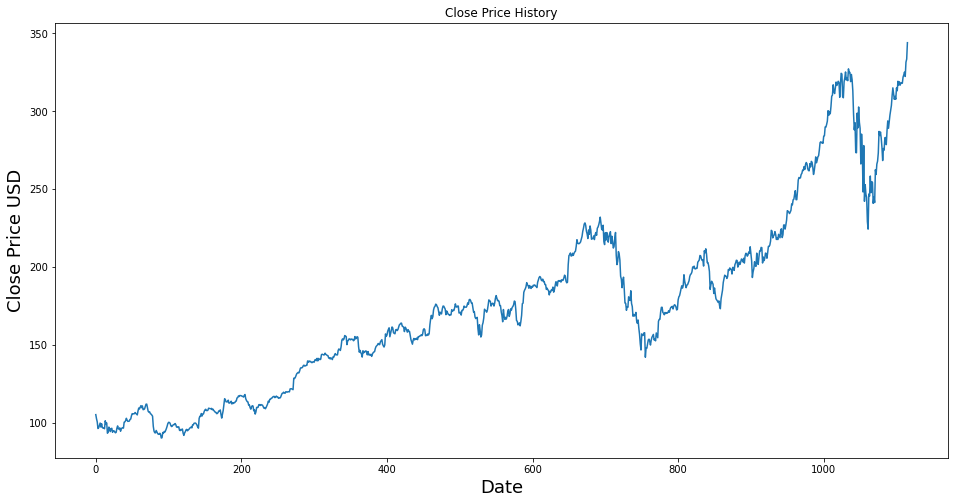

In [ ]:
#Original Data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(xtmp,ytmp)
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Close Price USD", fontsize=18)
plt.show()

In [ ]:
#Predict the next days
print(len(y))
training_data_len = math.ceil(len(y)*.8)
print(training_data_len)

X_train =xtmp[0:training_data_len-60]
Y_train =ytmp[0:training_data_len-60]

X_test =xtmp[training_data_len-60:training_data_len]
Y_test =ytmp[training_data_len-60:training_data_len]
X_train.shape

1116
893


(833, 1)

In [ ]:
#Building Model
model = LinearRegression()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

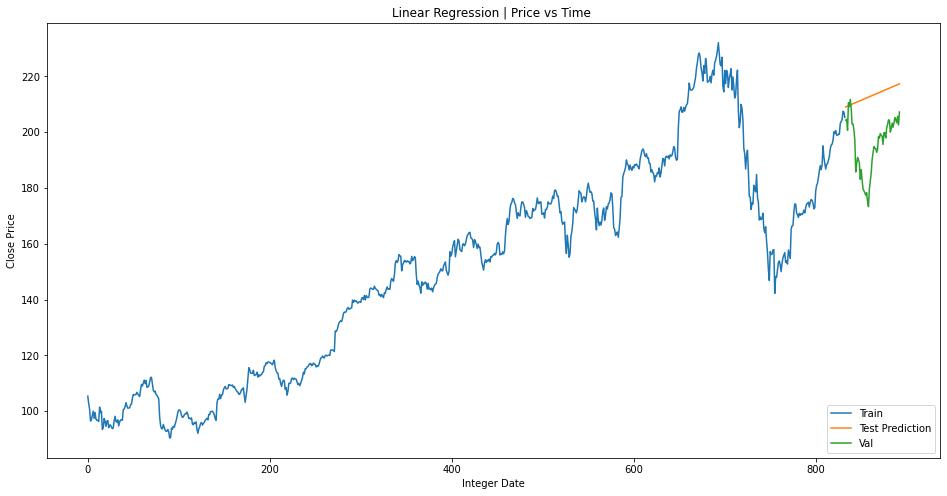

In [ ]:
#Plot the predicted data
plt.figure(figsize = (16,8))
plt.title('Linear Regression | Price vs Time ')
plt.plot(X_train,Y_train)
plt.plot(X_test,predictions,Y_test, label='Predicted Price')
plt.legend(['Train','Test Prediction','Val'],loc='lower right')
plt.xlabel('Integer Date')
plt.ylabel('Close Price')
plt.show()

In [ ]:
# Split the data to test , train
data_len = len(x)
data_len_fiftydays = data_len
sample_times = 20          #The Day how often the data will be predicted 
data_len = data_len/sample_times
data_len = int(data_len)
#Adding extra 50 days for predicting last 50 days
dayarray=[]
for i in range(0,data_len):
  dayarray.append(i*sample_times)

lastfiftydays=[]
for i in range(0,data_len_org+sample_times):
  lastfiftydays.append(i)
lastfiftydays = pd.DataFrame(lastfiftydays)

count =1

R2 for  1 . Prediction: 0.31641217157984713 Slope : [[-0.27193982]]
R2 for  2 . Prediction: 0.321449531818529 Slope : [[0.15680464]]
R2 for  3 . Prediction: 0.811344966104028 Slope : [[0.39380444]]
R2 for  4 . Prediction: 0.5302462546555504 Slope : [[-0.40724806]]
R2 for  5 . Prediction: 0.1981207781607107 Slope : [[0.16245112]]
R2 for  6 . Prediction: 0.7449297753147996 Slope : [[-0.24055634]]
R2 for  7 . Prediction: 0.9019904792884093 Slope : [[0.37805274]]
R2 for  8 . Prediction: 0.7455838396532963 Slope : [[0.54208286]]
R2 for  9 . Prediction: 0.23016221900342249 Slope : [[0.26148863]]
R2 for  10 . Prediction: 0.5727484025421182 Slope : [[0.23656396]]
R2 for  11 . Prediction: 0.8966993002139645 Slope : [[-0.60644367]]
R2 for  12 . Prediction: 0.35346700405899434 Slope : [[0.18101508]]
R2 for  13 . Prediction: 0.5712403441246627 Slope : [[0.16542859]]
R2 for  14 . Prediction: 0.8647221599691874 Slope : [[0.81167647]]
R2 for  15 . Prediction: 0.8131620529625925 Slope : [[0.2881052]]


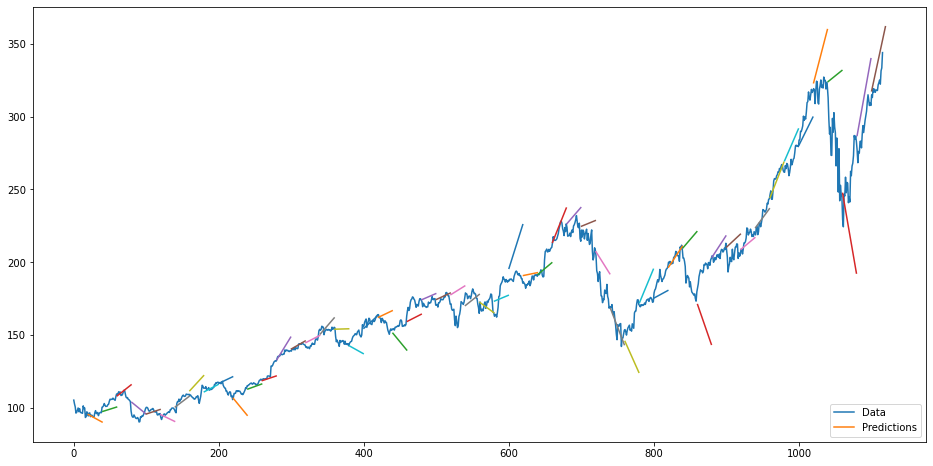

In [ ]:
#Predict for every 50 days.
lnmodel = LinearRegression()
plt.figure(figsize=(16,8))
plt.plot(xtmp,ytmp)
for i in dayarray:
  lnmodel.fit(xtmp[i:i+sample_times],ytmp[i:i+sample_times])
  lnprediction = lnmodel.predict(lastfiftydays[i+sample_times:i+sample_times+sample_times])
  plt.plot(lastfiftydays[i+sample_times:i+sample_times+sample_times],lnprediction)
  
  R2 = lnmodel.score(xtmp[i:i+sample_times],ytmp[i:i+sample_times])
  Slope =lnmodel.coef_
  print("R2 for ", count,". Prediction:",R2,"Slope :" , Slope)
  count=count+1

plt.legend(['Data','Predictions'],loc='lower right')

In [ ]:
#Get the slopes
slopemodel = LinearRegression()
slopearray = []
for i in dayarray:
  slopemodel.fit(xtmp[i:i+sample_times],ytmp[i:i+sample_times])
  lnprediction = slopemodel.predict(lastfiftydays[i+sample_times:i+sample_times+sample_times])
  new_slope = np.asscalar(slopemodel.coef_)
  slopearray.append(new_slope)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  import sys
/usr

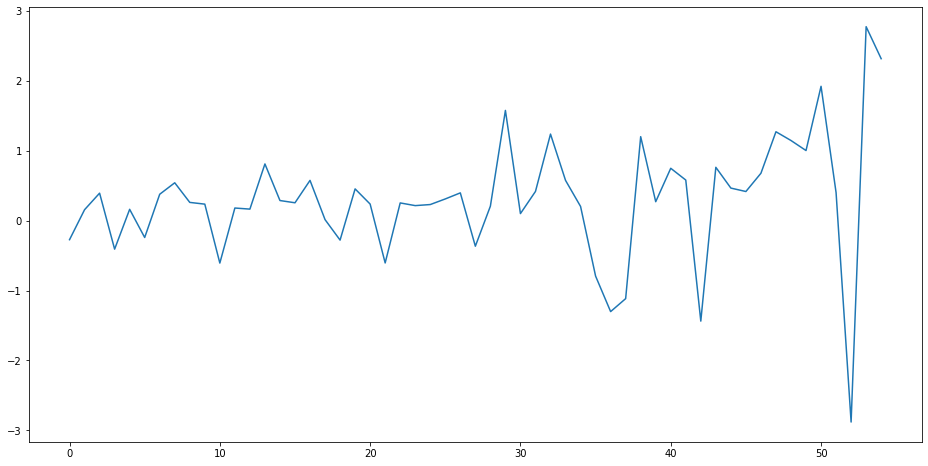

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(slopearray)

In [ ]:

for i in range (0,len(dayarray)):
  if slopearray[i]>0:
    slopearray[i]=1
  elif slopearray[i]<0:
    slopearray[i]=-1
  elif slopearray[i]==0:
    slopearray[i]=0    


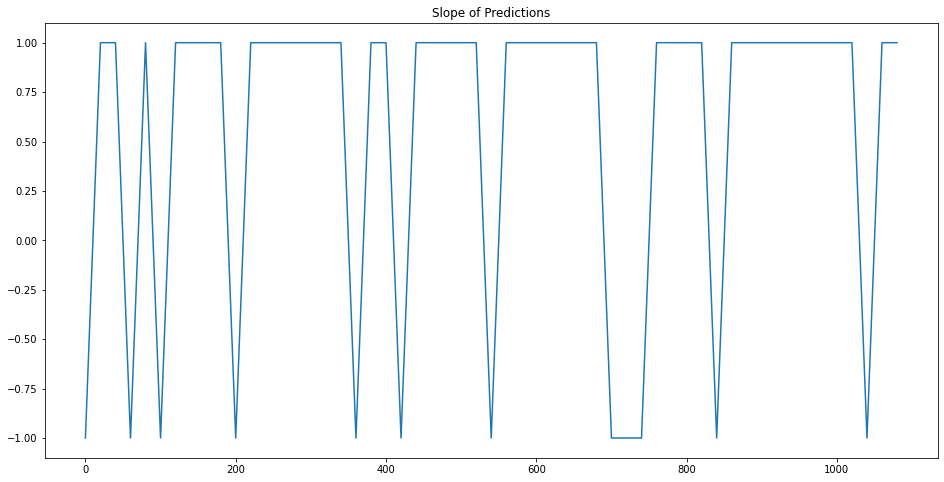

In [ ]:
#Plot the slopes
plt.figure(figsize=(16,8))
plt.title("Slope of Predictions")
plt.plot(dayarray,slopearray)
plt.show()

In [ ]:
#Slope training LSTM

a_train_len =math.ceil(len(slopearray)*.8)
a_slopearray=pd.DataFrame(slopearray)
a_slopearray=a_slopearray.values

In [ ]:
#Train and Test
a_train_data=a_slopearray[0:a_train_len,:]
a_xtrain=[]
a_ytrain=[]

for i in range(10,len(a_train_data)):
  a_xtrain.append(a_train_data[i-10:i,0])
  a_ytrain.append(a_train_data[i,0])
  

In [ ]:
a_xtrain, a_ytrain= np.array(a_xtrain),np.array(a_ytrain)
a_xtrain=np.reshape(a_xtrain,(a_xtrain.shape[0],a_xtrain.shape[1],1))
a_xtrain.shape

(34, 10, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [ ]:
#Build the LSTM Model
model=Sequential()    #1. Hidden Layer should be between input layer number and output layer number, 2.Hidden layers should be 2/3 times input layer 
model.add(LSTM(10,return_sequences=True,input_shape=(a_xtrain.shape[1],1))) # Input Layer
model.add(LSTM(8,return_sequences=False))
model.add(Dense(6)) #6 Neuron
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
history= model.fit(a_xtrain,a_ytrain,batch_size=1,epochs=3000)

Streaming output truncated to the last 5000 lines.
34/34 [==============================] - 0s 5ms/step - loss: 0.0731
Epoch 502/3000
34/34 [==============================] - 0s 5ms/step - loss: 0.0632
Epoch 503/3000
34/34 [==============================] - 0s 5ms/step - loss: 0.0693
Epoch 504/3000
34/34 [==============================] - 0s 5ms/step - loss: 0.0638
Epoch 505/3000
34/34 [==============================] - 0s 5ms/step - loss: 0.0625
Epoch 506/3000
34/34 [==============================] - 0s 5ms/step - loss: 0.0650
Epoch 507/3000
34/34 [==============================] - 0s 5ms/step - loss: 0.0692
Epoch 508/3000
34/34 [==============================] - 0s 5ms/step - loss: 0.0677
Epoch 509/3000
34/34 [==============================] - 0s 5ms/step - loss: 0.0672
Epoch 510/3000
34/34 [==============================] - 0s 5ms/step - loss: 0.0869
Epoch 511/3000
34/34 [==============================] - 0s 6ms/step - loss: 0.2850
Epoch 512/3000
34/34 [=============================

[0.8927700519561768, 0.7752957940101624, 0.7540854811668396, 0.732442319393158, 0.7304275631904602, 0.7335377931594849, 0.7426681518554688, 0.7293410897254944, 0.7270539402961731, 0.7386563420295715, 0.7340472936630249, 0.7148017883300781, 0.7275264263153076, 0.7219564914703369, 0.7080044746398926, 0.7117319703102112, 0.7089177966117859, 0.7109901309013367, 0.7080905437469482, 0.713753879070282, 0.6950848698616028, 0.7096994519233704, 0.7098746299743652, 0.7130448818206787, 0.6803710460662842, 0.6903424263000488, 0.6909648180007935, 0.6949239373207092, 0.6618049144744873, 0.6604418158531189, 0.6725053787231445, 0.6697294116020203, 0.6537336707115173, 0.6804478168487549, 0.6351446509361267, 0.6482847929000854, 0.64683997631073, 0.6130049228668213, 0.608112633228302, 0.6230457425117493, 0.5828298926353455, 0.596314013004303, 0.6058319807052612, 0.551615834236145, 0.546346127986908, 0.5163313150405884, 0.5106711387634277, 0.5202475786209106, 0.4808129668235779, 0.5292131304740906, 0.47633

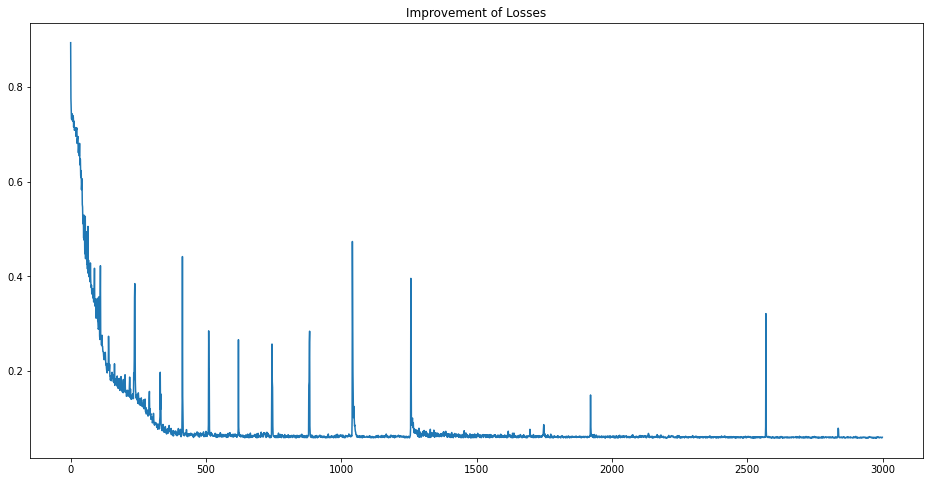

In [ ]:
#Plotting the losses of each epoch

print(history.history['loss'])
loss_history = history.history['loss']

plt.figure(figsize=(16,8))
plt.title("Improvement of Losses")
plt.plot(loss_history)

In [ ]:
test_data = a_slopearray[a_train_len-10:,:]
a_xtest =[]
a_ytest =a_slopearray[a_train_len:,:]
for i in range(10,len(test_data)):
  a_xtest.append(test_data[i-10:i,0])

a_xtest = np.array(a_xtest) 
a_xtest = np.reshape(a_xtest,(a_xtest.shape[0],a_xtest.shape[1],1))

predictions = model.predict(a_xtest)

Root Mean Squarred Error 0.3593733397058465


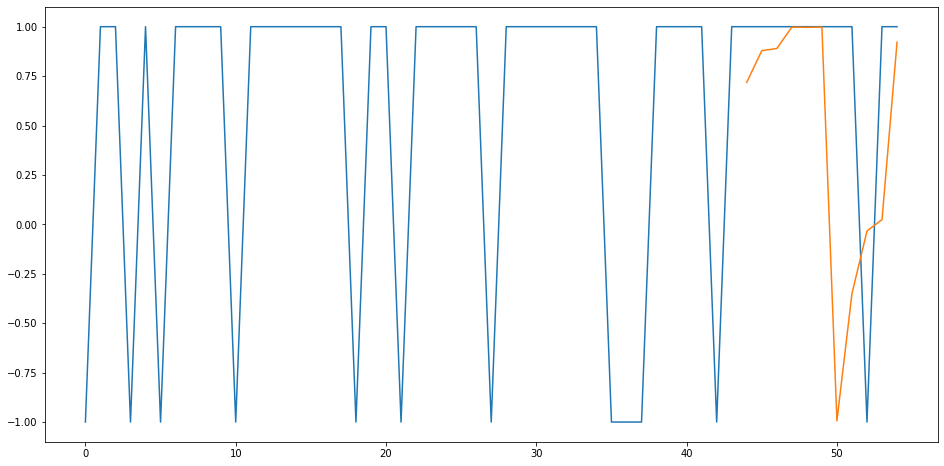

In [ ]:
rmse = np.sqrt(np.mean(predictions-a_ytest)**2)
print("Root Mean Squarred Error",rmse)
length = xtmp[a_train_len:len(a_slopearray)]

plt.figure(figsize=(16,8))
plt.plot(a_slopearray)
plt.plot(length,predictions)

In [ ]:
new_samples = sample_times*length
new_samples

rising=[]
falling=[]


for i in range(0,len(predictions)):
  if predictions[i]>0:
    rising.append((i+44)*sample_times)
  elif predictions[i]<0:
    falling.append((i+44)*sample_times)  


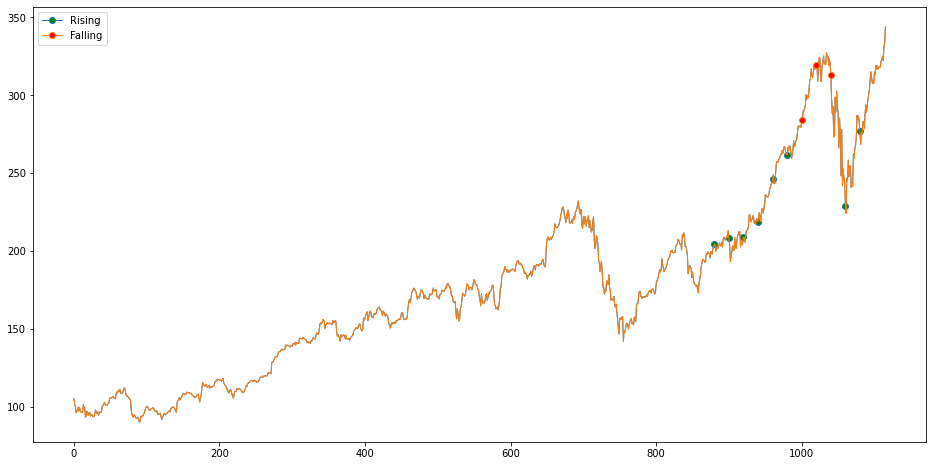

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(xtmp,ytmp,marker='o',markevery=rising,markerfacecolor='green',linewidth=1)
plt.plot(xtmp,ytmp,marker='o',markevery=falling,markerfacecolor='red',linewidth=1)
plt.legend(['Rising',"Falling"])